In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [5]:
df=pd.read_csv('/content/sample_data/loan_data_set.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':'Approved','N':'Rejected'})

In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Approved
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Rejected
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Approved
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Approved
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Approved
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Approved
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Approved
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Approved


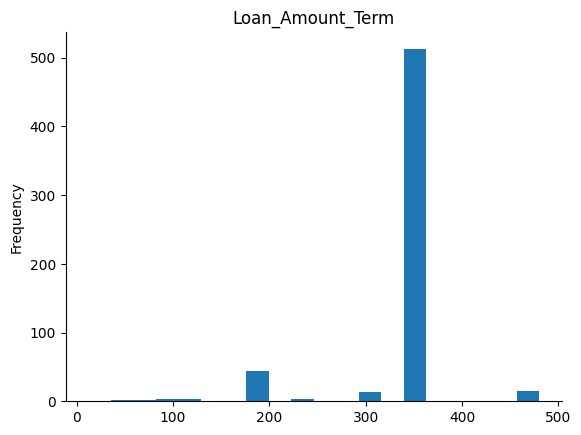

In [6]:
# @title Loan_Amount_Term

from matplotlib import pyplot as plt
df['Loan_Amount_Term'].plot(kind='hist', bins=20, title='Loan_Amount_Term')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


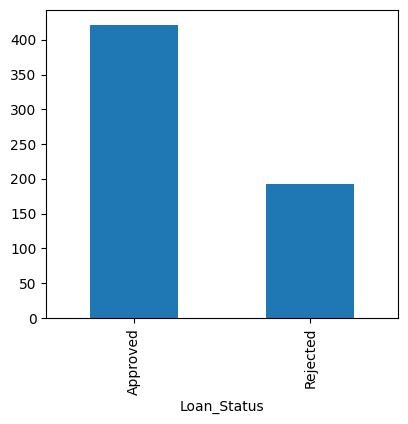

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()



<Axes: xlabel='Property_Area'>

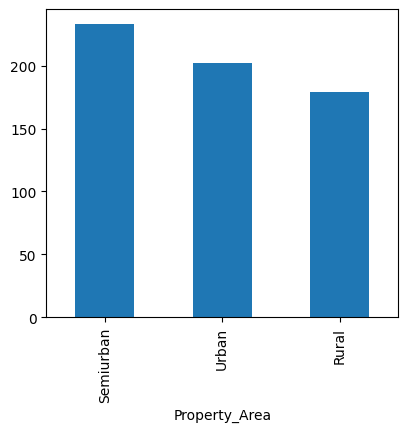

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Property_Area'].value_counts().plot(kind='bar')



In [73]:
df2=pd.read_excel('/content/loan2_.xlsx')

In [74]:
df2

,LoanID,Loan_status,Submission date,Decision date,Married,Dependents,Education,Area,Loan_amount
0,1,rejected,2025-01-01,2025-01-15,No,0,Graduate,Urban,128.0
1,2,approved,2025-01-02,2025-01-07,Yes,1,Graduate,Rural,66.0
2,3,rejected,2025-01-03,2025-01-23,Yes,0,Graduate,Urban,120.0
3,4,approved,2025-01-04,2025-01-14,Yes,0,Not Graduate,Urban,141.0
4,5,rejected,2025-01-05,2025-01-30,No,0,Graduate,Urban,267.0
...,...,...,...,...,...,...,...,...,...
95,96,approved,2025-01-12,2025-01-23,No,0,Graduate,Urban,81.0
96,97,rejected,2025-02-16,2025-03-11,Yes,0,Graduate,Semiurban,187.0
97,98,approved,2025-02-28,2025-03-19,Yes,0,Graduate,Semiurban,87.0
98,99,rejected,2025-02-20,2025-03-05,Yes,0,Not Graduate,Semiurban,116.0


In [77]:
#compute time between submissiontime and decisiontime

# Ensure the columns are in datetime format if they aren't already
df2['Submission date'] = pd.to_datetime (df2['Submission date'])
df2['Decision date'] = pd.to_datetime(df2['Decision date'])

# Compute the difference
df2['Processing_date'] = df2['Decision date'] - df2['Submission date']

# Print the DataFrame to see the new column
print(df2[['Submission date', 'Decision date', 'Processing_date']])
df2

   Submission date Decision date Processing_date
0       2025-01-01    2025-01-15         14 days
1       2025-01-02    2025-01-07          5 days
2       2025-01-03    2025-01-23         20 days
3       2025-01-04    2025-01-14         10 days
4       2025-01-05    2025-01-30         25 days
..             ...           ...             ...
95      2025-01-12    2025-01-23         11 days
96      2025-02-16    2025-03-11         23 days
97      2025-02-28    2025-03-19         19 days
98      2025-02-20    2025-03-05         13 days
99      2025-02-25    2025-03-09         12 days

[100 rows x 3 columns]


,LoanID,Loan_status,Submission date,Decision date,Married,Dependents,Education,Area,Loan_amount,Processing_date
0,1,rejected,2025-01-01,2025-01-15,No,0,Graduate,Urban,128.0,14 days
1,2,approved,2025-01-02,2025-01-07,Yes,1,Graduate,Rural,66.0,5 days
2,3,rejected,2025-01-03,2025-01-23,Yes,0,Graduate,Urban,120.0,20 days
3,4,approved,2025-01-04,2025-01-14,Yes,0,Not Graduate,Urban,141.0,10 days
4,5,rejected,2025-01-05,2025-01-30,No,0,Graduate,Urban,267.0,25 days
...,...,...,...,...,...,...,...,...,...,...
95,96,approved,2025-01-12,2025-01-23,No,0,Graduate,Urban,81.0,11 days
96,97,rejected,2025-02-16,2025-03-11,Yes,0,Graduate,Semiurban,187.0,23 days
97,98,approved,2025-02-28,2025-03-19,Yes,0,Graduate,Semiurban,87.0,19 days
98,99,rejected,2025-02-20,2025-03-05,Yes,0,Not Graduate,Semiurban,116.0,13 days


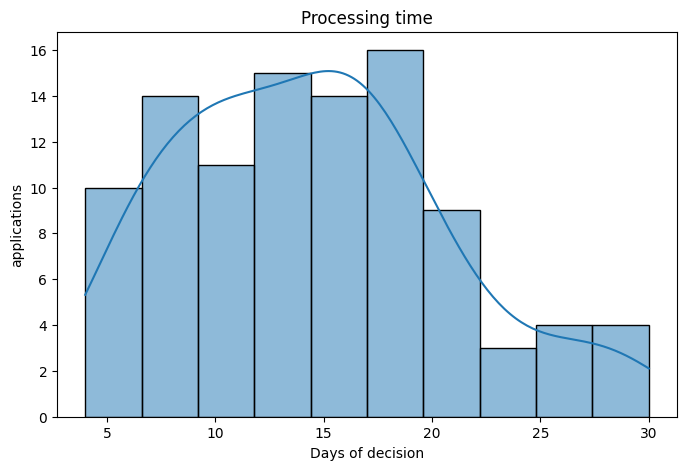

In [58]:
#Processing time using histogram
plt.figure(figsize=(8,5))
sns.histplot(df2['Processing_date'].dt.days,bins=10,kde=True)
plt.title('Processing time')
plt.xlabel('Days of decision')
plt.ylabel('applications')
plt.show()


/tmp/ipython-input-92-9193288.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




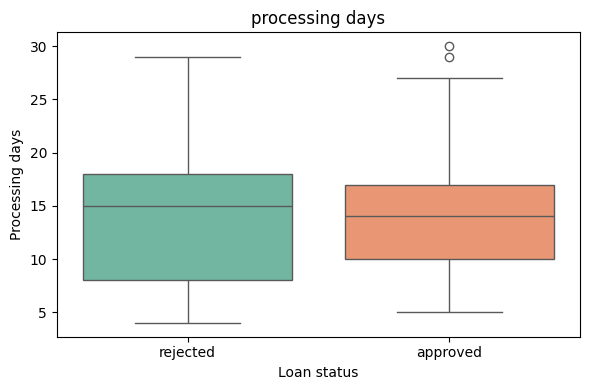

In [92]:
#Boxplot by status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_status',y=df2['Processing_date'].dt.days,data=df2,palette='Set2')
plt.title('processing days')
plt.xlabel('Loan status')
plt.ylabel('Processing days')
plt.tight_layout()
plt.show()

In [84]:
#Funnel visualisations
import warnings as warnings
import pandas as pd
import plotly.graph_objects as go
df2['Submission date'] = pd.to_datetime (df2['Submission date'])
df2['Decision date'] = pd.to_datetime(df2['Decision date'])

# Compute the difference
df2['Processing_date'] = df2['Decision date'] - df2['Submission date']

# Print the DataFrame to see the new column (Optional, keep for debugging)
# print(df2[['Submission date', 'Decision date', 'Processing_date']])

# Now df2['Processing_date'] is a Timedelta series, which is needed for the next step.
# Funnel visualisations
import warnings as warnings
import pandas as pd
import plotly.graph_objects as go

# The bins should be Timedelta objects to cut a Timedelta series
bins=[pd.Timedelta(days=0),
      pd.Timedelta(days=5),
      pd.Timedelta(days=10),
      pd.Timedelta(days=15),
      pd.Timedelta(days=20),
      pd.Timedelta(days=25),
      pd.Timedelta(days=30),
      # Ensure the max is a Timedelta before adding another Timedelta
      df2['Processing_date'].max() + pd.Timedelta(days=1)]

label=['0-5 days','6-10 days','11-15 days','16-20 days','21-25 days','26-30 days','30+ days']

# pd.cut works correctly with Timedelta series and Timedelta bins
df2['approval_range']=pd.cut(df2['Processing_date'],bins=bins,labels=label,right=False)

funnel_data=df2['approval_range'].value_counts().sort_index()
funnel_data=funnel_data.reindex(label,fill_value=0)

fig_data =go.Funnel(
    y=funnel_data.index.astype(str),
    x=funnel_data.values,
    textinfo="value"
)

fig=go.Figure(fig_data)
fig.update_layout(title="Funnel of loan approvals by processing Days")
fig.show()


In [40]:
#Cateogory-wise success breakdowns by gender,martial status,education,number of dependents,loan amount bucket


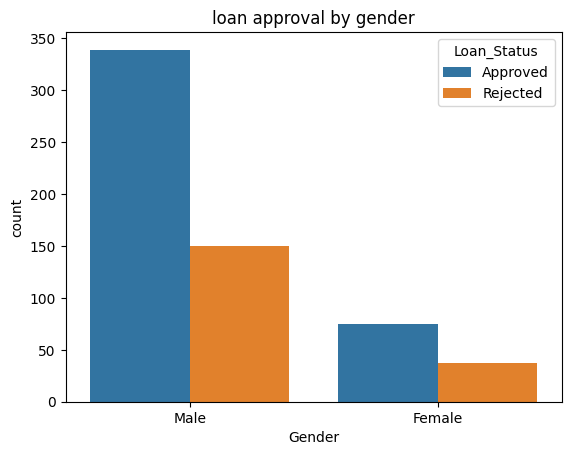

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Gender',hue='Loan_Status')
plt.title("loan approval by gender")
plt.ylabel("count")
plt.show()

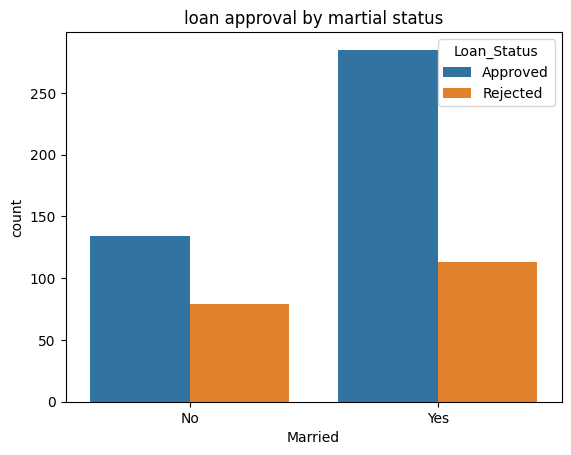

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Married',hue='Loan_Status')
plt.title("loan approval by martial status")
plt.show()

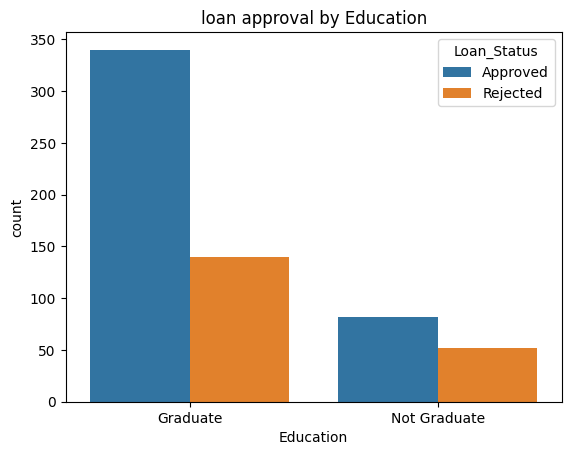

In [43]:
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.title("loan approval by Education")
plt.show()

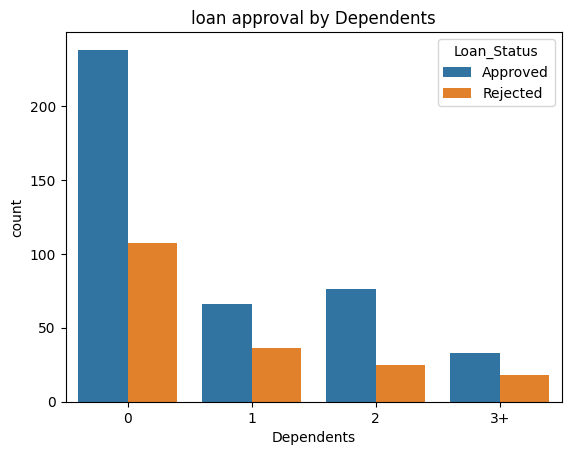

In [44]:
sns.countplot(data=df,x='Dependents',hue='Loan_Status')
plt.title("loan approval by Dependents")
plt.show()

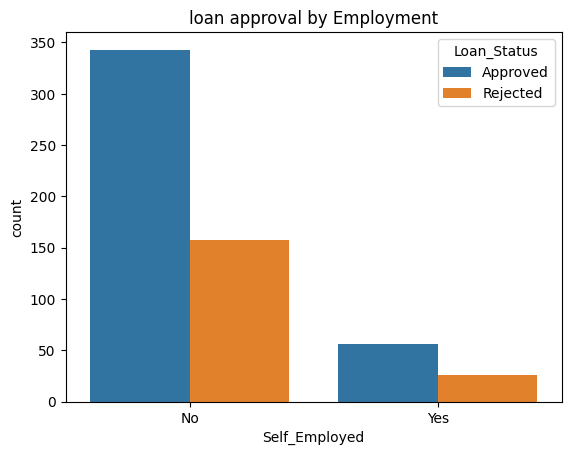

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status') # Removed the trailing tab
plt.title("loan approval by Employment")
plt.show()

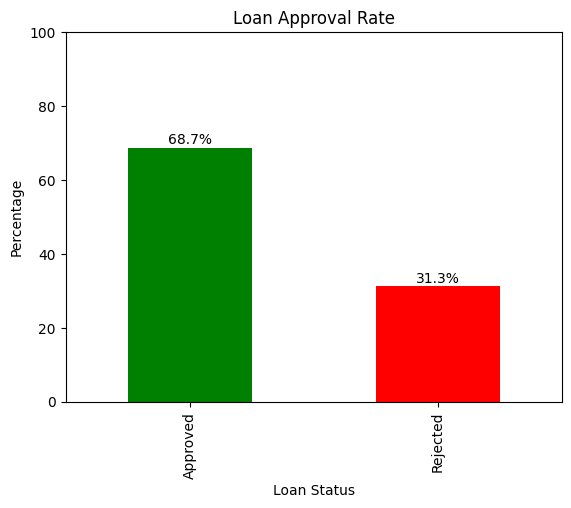

In [49]:
approval_rate=df['Loan_Status'].value_counts(normalize=True)*100
approval_rate.plot(kind='bar',color=['green','red'])
plt.title("Loan Approval Rate")
plt.ylabel('Percentage')
plt.xlabel('Loan Status')
for i,value in enumerate(approval_rate.values):
  plt.text(i,value+1,f"{value:.1f}%",ha='center')
plt.ylim(0,100)
plt.show()

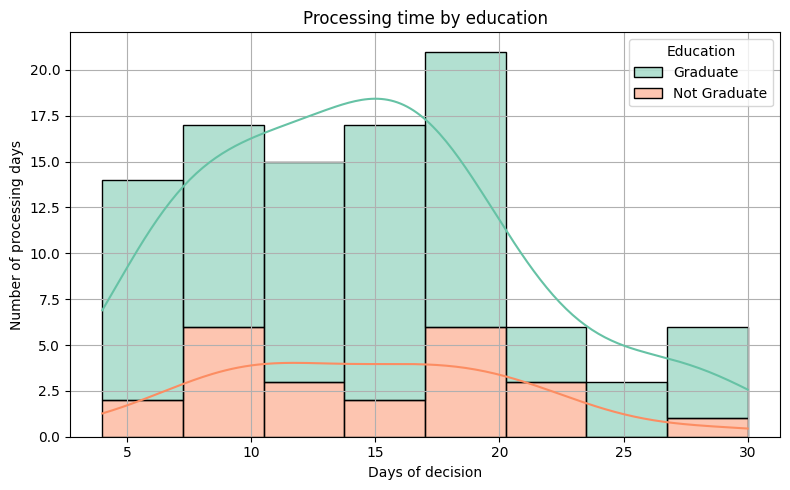

In [85]:
# Processing time using histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df2, x=df2['Processing_date'].dt.days, hue='Education', kde=True, multiple='stack', palette='Set2')
plt.title('Processing time by education')
plt.xlabel('Days of decision') # Update xlabel to reflect days
plt.ylabel('Number of processing days')
plt.grid(True)
plt.tight_layout()
plt.show()


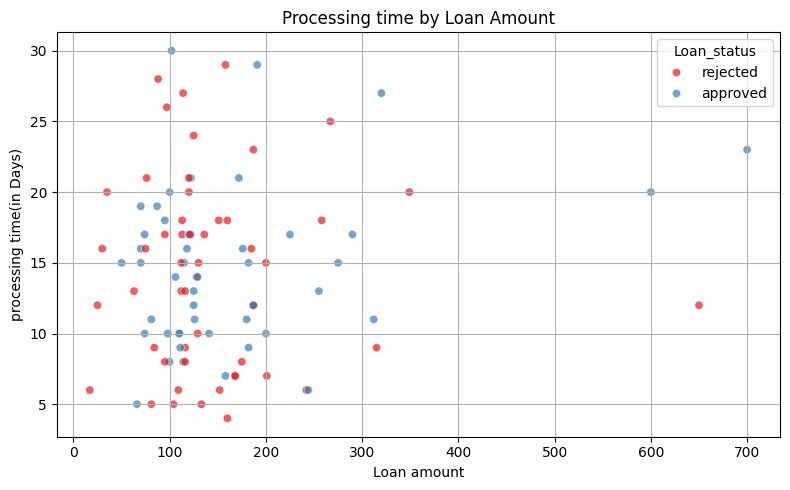

In [82]:
# Processing time using histogram
plt.figure(figsize=(8, 5))
df2['Processing_date']=df2['Processing_date'].dt.days
sns.scatterplot(data=df2, x='Loan_amount', y='Processing_date', hue='Loan_status', alpha=0.7, palette='Set1')
plt.title('Processing time by Loan Amount')
plt.xlabel('Loan amount')
plt.ylabel('processing time(in Days)')
plt.grid(True)
plt.tight_layout()
plt.show()